In [3]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [4]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ML_domain_of_applicability/LI-ion batteries/work/NCM-ML')

Mounted at /content/drive


In [5]:
data = pd.read_csv('NMC_numerical_new.csv')

In [6]:
X = data.drop(['IC', 'EC'], axis=1)
y_IC = data['IC']
y_EC = data['EC']

X_train, X_test, y_EC_train, y_EC_test = train_test_split(X, y_EC, test_size=0.2, random_state=42)
_, _, y_IC_train, y_IC_test = train_test_split(X, y_IC, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
def calculate_errors(y_train, y_train_pred, y_test, y_test_pred):
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    return rmse_train, rmse_test, r2_test

In [8]:
def plot_IC_curve(y_IC_train, y_train_pred, y_IC_test, y_test_pred, rmse_train, rmse_test, r2_test, model_name):
    results_train = pd.DataFrame({
        "Experimental": y_IC_train,
        "Predicted": y_train_pred
    })
    results_test = pd.DataFrame({
        "Experimental": y_IC_test,
        "Predicted": y_test_pred
    })

    plt.figure(figsize=(8, 8))
    plt.axis([50, 330, 50, 330])

    plt.scatter(x=results_train["Experimental"], y=results_train["Predicted"], c='deepskyblue', label='Training')
    plt.scatter(x=results_test["Experimental"], y=results_test["Predicted"], c='blue', label='Test')

    plt.plot([50, 360], [50, 360], label='True Line', color='red', linewidth=2)

    plt.legend(loc='lower right')
    plt.xlabel(r'Experimental Initial Charge Capacity (IC) (mAh/g)')
    plt.ylabel(r'Predicted Initial Charge Capacity (IC) (mAh/g)')
    plt.title(f'{model_name} - IC Results Plot')

    plt.text(60, 260, f"$RMSE_{{train}} = {rmse_train:.2f} \, mAh/g$\n" +
            f"$RMSE_{{test}} = {rmse_test:.2f} \, mAh/g$\n" +
            f"$R^2_{{test}} = {r2_test:.2f}$", fontsize=12)

    plt.savefig(f'{model_name}-IC-Predicted-vs-Test.png', dpi=1000)

    plt.show()

In [9]:
def plot_EC_curve(y_EC_train, y_train_pred, y_EC_test, y_test_pred, rmse_train, rmse_test, r2_test, model_name):
    results_train = pd.DataFrame({
        "Experimental": y_EC_train,
        "Predicted": y_train_pred
    })
    results_test = pd.DataFrame({
        "Experimental": y_EC_test,
        "Predicted": y_test_pred
    })

    plt.figure(figsize=(8, 8))
    plt.axis([50, 330, 50, 330])

    plt.scatter(x=results_train["Experimental"], y=results_train["Predicted"], c='deepskyblue', label='Training')
    plt.scatter(x=results_test["Experimental"], y=results_test["Predicted"], c='blue', label='Test')

    plt.plot([50, 360], [50, 360], label='True Line', color='red', linewidth=2)

    plt.legend(loc='lower right')
    plt.xlabel(r'Experimental 50th cycle discharge Capacity (EC) (mAh/g)')
    plt.ylabel(r'Predicted 50th cycle discharge Capacity (EC) (mAh/g)')
    plt.title(f'{model_name} - EC Results Plot')

    plt.text(60, 260, f"$RMSE_{{train}} = {rmse_train:.2f} \, mAh/g$\n" +
            f"$RMSE_{{test}} = {rmse_test:.2f} \, mAh/g$\n" +
            f"$R^2_{{test}} = {r2_test:.2f}$", fontsize=12)

    plt.savefig(f'{model_name}-EC-Predicted-vs-Test.png', dpi=1000)

    plt.show()

# Random Forest

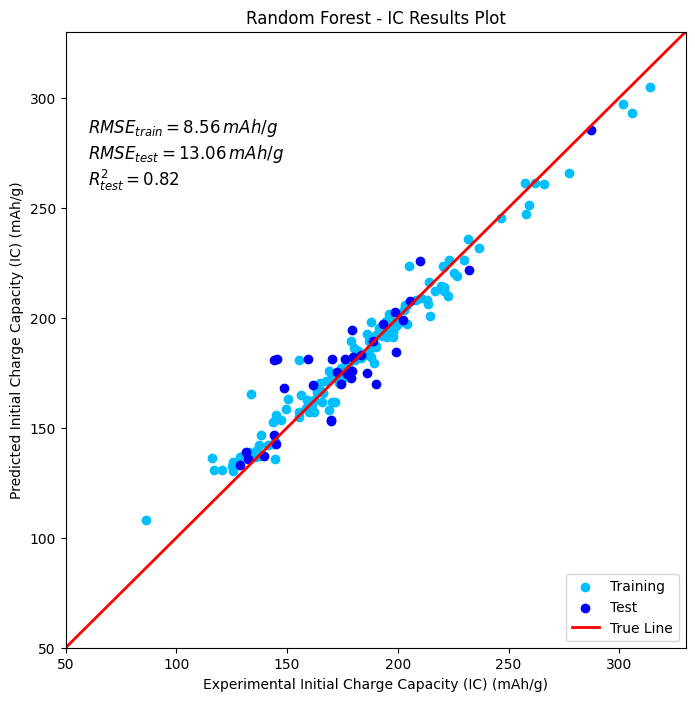

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_IC_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

rmse_train, rmse_test, r2_test = calculate_errors(y_IC_train, y_train_pred, y_IC_test, y_test_pred)
plot_IC_curve(y_IC_train, y_train_pred, y_IC_test, y_test_pred, rmse_train, rmse_test, r2_test, "Random Forest")

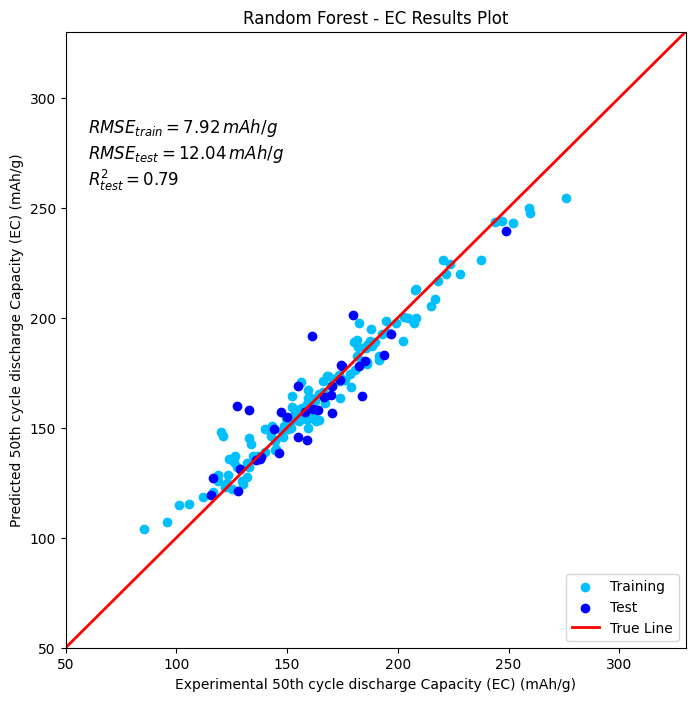

In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_EC_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

rmse_train, rmse_test, r2_test = calculate_errors(y_EC_train, y_train_pred, y_EC_test, y_test_pred)
plot_EC_curve(y_EC_train, y_train_pred, y_EC_test, y_test_pred, rmse_train, rmse_test, r2_test, "Random Forest")

# XGboost

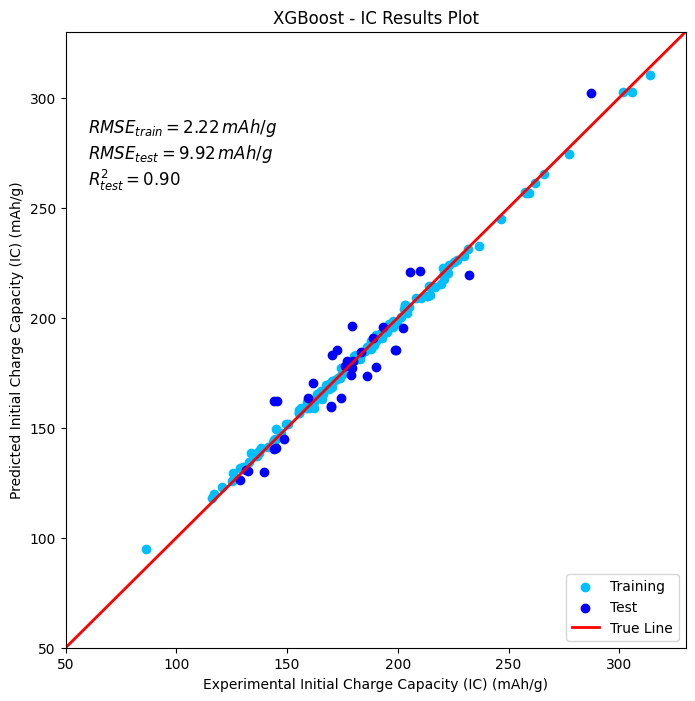

In [12]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_scaled, y_IC_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

rmse_train_xgb, rmse_test_xgb, r2_test_xgb = calculate_errors(y_IC_train, y_train_pred_xgb, y_IC_test, y_test_pred_xgb)
plot_IC_curve(y_IC_train, y_train_pred_xgb, y_IC_test, y_test_pred_xgb, rmse_train_xgb, rmse_test_xgb, r2_test_xgb, "XGBoost")


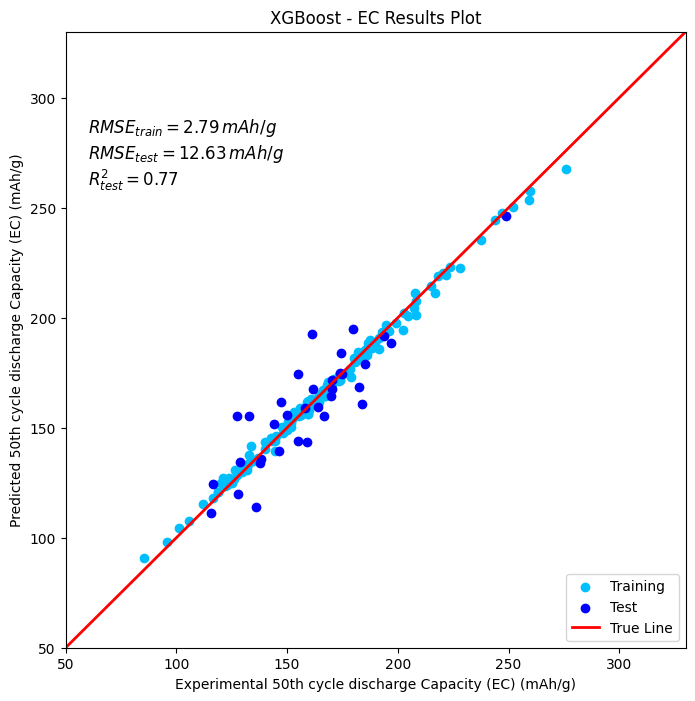

In [13]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_scaled, y_EC_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

rmse_train_xgb, rmse_test_xgb, r2_test_xgb = calculate_errors(y_EC_train, y_train_pred_xgb, y_EC_test, y_test_pred_xgb)
plot_EC_curve(y_EC_train, y_train_pred_xgb, y_EC_test, y_test_pred_xgb, rmse_train_xgb, rmse_test_xgb, r2_test_xgb, "XGBoost")


# SVR

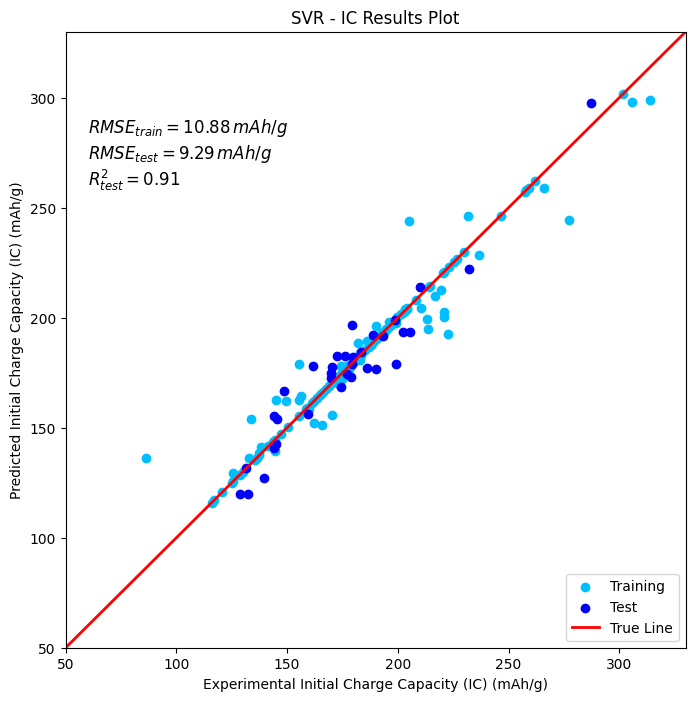

In [14]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
svr_model.fit(X_train_scaled, y_IC_train)

y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

rmse_train, rmse_test, r2_test = calculate_errors(y_IC_train, y_train_pred, y_IC_test, y_test_pred)
plot_IC_curve(y_IC_train, y_train_pred, y_IC_test, y_test_pred, rmse_train, rmse_test, r2_test, "SVR")

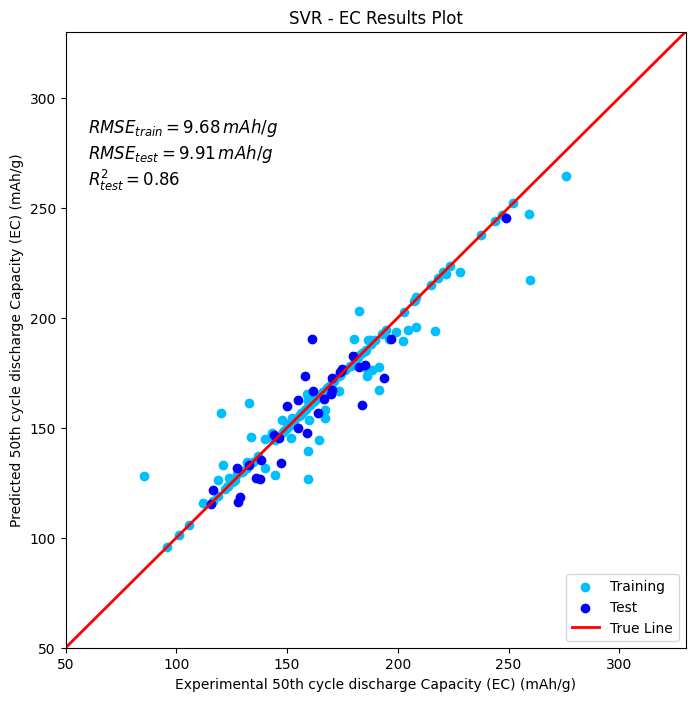

In [15]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
svr_model.fit(X_train_scaled, y_EC_train)

y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

rmse_train, rmse_test, r2_test = calculate_errors(y_EC_train, y_train_pred, y_EC_test, y_test_pred)
plot_EC_curve(y_EC_train, y_train_pred, y_EC_test, y_test_pred, rmse_train, rmse_test, r2_test, "SVR")

In [16]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_EC_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

best_rf_r2 = r2_score(y_EC_test, y_pred_best_rf)
print("Optimized Random Forest R2 Score:", best_rf_r2)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest R2 Score: 0.7899927982553052
